<a href="https://colab.research.google.com/github/azu07/Hybrid---Siamese-Network-and-Chaotic-Visual-Cryptography-/blob/main/new_CVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<**Chaotic map**  >

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
from google.colab import files

Mounted at /content/gdrive


In [ ]:
import numpy as np

def logistic_key(x, r, size):
    key = []
    for i in range(size):   
        x = r*x*(1-x)   # The logistic equation
        key.append(int((x*pow(10, 16))%256))    # Converting the generated number between 0 to 255
    return key

def tent_key(init,p,steps):
    xs = np.arange(steps)
    ys = np.zeros((steps))
    ys[0] = init
    key = []
    key.append(16)
    for i in range(1,steps):
        y = ys[i-1]
        if (y < 0.5 and y >=0.0):
            ys[i] = p*y
        elif (y >=0.5):
            ys[i] = p*(1-y)
        key.append(int((ys[i]*pow(10, 5))%256))    # Converting the generated number between 0 to 255
    return key

def lorenz_key(xinit, yinit, zinit, num_steps):
    dt = 0.01
    # Initializing 3 empty lists
    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)
    # Initializing initial values
    xs[0], ys[0], zs[0] = (xinit, yinit, zinit)
    # Initializing constants
    s = 10
    r = 28
    b = 2.667
    # System of equations
    for i in range(num_steps):
        xs[i + 1] = xs[i] + (s * (ys[i] - xs[i]) * dt)
        ys[i + 1] = ys[i] + ((xs[i] * (r - zs[i]) - ys[i]) * dt)
        zs[i + 1] = zs[i] + ((xs[i] * ys[i] - b * zs[i]) * dt)

    return xs, ys, zs

In [ ]:
pip install chaotic-maps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import glob
import os
import PIL

In [ ]:
"""
# Importing Image class from PIL module
from PIL import Image

list1=['/content/gdrive/MyDrive/MIT-CBCL-facerec-database/training-originals/10/0000_00000001.jpg']
path = r'/content/gdrive/MyDrive/MIT-CBCL-facerec-database/training-originals'
#for img in enumerate(os.listdir(path)):
for f_img in list1:
  print(f_img)
  image = Image.open(f_img)
  image = image.resize((576,576), resample = Image.BILINEAR)
  image.save('a.jpg')
  '''
  img = img.resize((576,576), resample = Image.BILINEAR)
  img.save('/content/gdrive/MyDrive/MIT-CBCL-facerec-database/training_cvc', 'JPG')

# Opens a image in RGB mode
im = Image.open('/content/gdrive/MyDrive/Colab Notebooks/0000_00000001.jpg')
 
im.size'
"""

"\n# Importing Image class from PIL module\nfrom PIL import Image\n\nlist1=['/content/gdrive/MyDrive/MIT-CBCL-facerec-database/training-originals/10/0000_00000001.jpg']\npath = r'/content/gdrive/MyDrive/MIT-CBCL-facerec-database/training-originals'\n#for img in enumerate(os.listdir(path)):\nfor f_img in list1:\n  print(f_img)\n  image = Image.open(f_img)\n  image = image.resize((576,576), resample = Image.BILINEAR)\n  image.save('a.jpg')\n  '''\n  img = img.resize((576,576), resample = Image.BILINEAR)\n  img.save('/content/gdrive/MyDrive/MIT-CBCL-facerec-database/training_cvc', 'JPG')\n\n# Opens a image in RGB mode\nim = Image.open('/content/gdrive/MyDrive/Colab Notebooks/0000_00000001.jpg')\n \nim.size'\n"

In [ ]:
#im.resize((576,576))

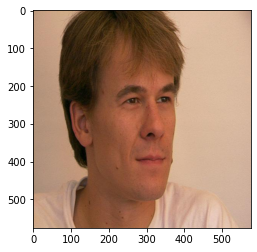

Height: 576   Width: 576
576
576


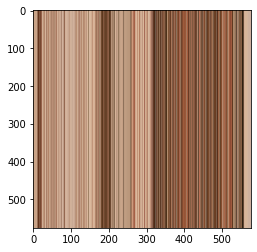

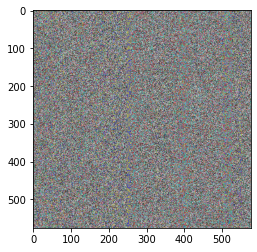

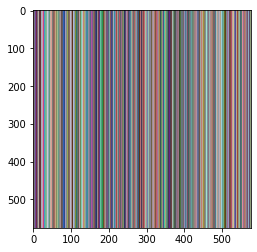

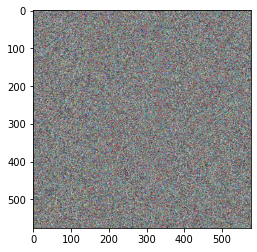

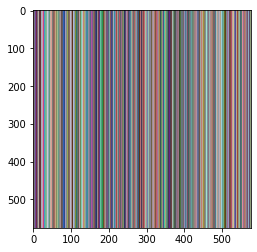

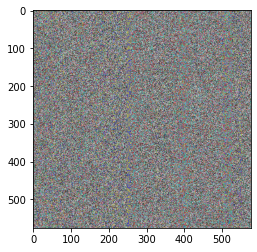

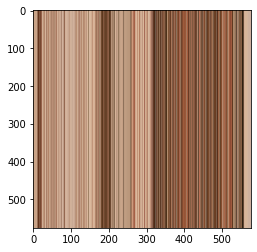

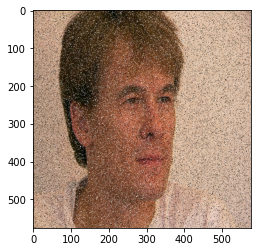

In [ ]:
import chaotic_maps as cm
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

# Accepting Image using it's path
#path = str(input('Enter path of the image\n'))
image = img.imread('/content/gdrive/MyDrive/MIT-CBCL-facerec-database/training_cvc/1/1.jpg')
#imaget = img.imread(r"C:\Users\mr\OneDrive\Desktop\mini project\cameraman.jpg")
# Displaying original image
plt.imshow(image)
plt.show()
# Storing the size of image in variables
height = image.shape[0]
width = image.shape[1]
print("Height:",height,"  Width:",width)
# Using lorenz_key function to generate 3 lists of keys
xkey, ykey, zkey = lorenz_key(0.01, 0.02, 0.03, height*width)
# Initializing empty index lists to store index of pixels
xindex = []
yindex = []
# Initializing an empty image to store the encrypted image
encryptedImage = np.zeros(shape=[height, width, 3], dtype=np.uint8)
l = 0
# Populating xindex and yindex
for i in range(width):
    xindex.append(i)
for i in range(height):
    yindex.append(i)
# Re-arranging xindex and xkey to increase randomness
for i in range(width):
    for j in range(width):
        if xkey[i] > xkey[j]:
            xkey[i], xkey[j] = xkey[j], xkey[i]
            xindex[i], xindex[j] = xindex[j], xindex[i]
print(len(xindex))            
# Re-arranging yindex and ykey to increase randomness
for i in range(height):
    for j in range(height):
        if ykey[i] > ykey[j]:
            ykey[i], ykey[j] = ykey[j], ykey[i]
            yindex[i], yindex[j] = yindex[j], yindex[i]
print(len(yindex))
# Shuffling original image's pixels and storing them in an empty image
for i in range(height):
    k = 0
    for j in range(width):
        #print(k)
        encryptedImage[i][j] = image[xindex[k]][yindex[k]] 
        k += 1
# Displaying the shuffled image
plt.imshow(encryptedImage)
plt.show()
# Calling logistic_key and providing r value such that the keys are pseudo-random
# and generating a key for every pixel of the image
generatedKey =logistic_key(0.01, 3.95, height*width) 
z = 0
# Substituting all the pixels in original image using XOR
for i in range(height):
    for j in range(width):
        encryptedImage[i, j] = encryptedImage[i, j].astype(int) ^ generatedKey[z]
        z += 1
# Displaying the intermediate encrypted image
plt.imshow(encryptedImage)
plt.show()
# Using lorenz_key function to generate 3 lists of keys
xkey1, ykey1, zkey1 = lorenz_key(0.03, 0.02, 0.01, height*width)
# Initializing empty index lists to store index of pixels
xindex1 = []
yindex1 = []
# Initializing an empty image to store the encrypted image
encryptedImage2 = np.zeros(shape=[height, width, 3], dtype=np.uint8)
l = 0
# Populating xindex and yindex
for i in range(width):
    xindex1.append(i)
for i in range(height):
    yindex1.append(i)
# Re-arranging xindex and xkey to increase randomness
for i in range(width):
    for j in range(width):
        if xkey1[i] > xkey1[j]:
            xkey1[i], xkey1[j] = xkey1[j], xkey1[i]
            xindex1[i], xindex1[j] = xindex1[j], xindex1[i]
# Re-arranging yindex and ykey to increase randomness
for i in range(height):
    for j in range(height):
        if ykey1[i] > ykey1[j]:
            ykey1[i], ykey1[j] = ykey1[j], ykey1[i]
            yindex1[i], yindex1[j] = yindex1[j], yindex1[i]
# Shuffling encrypted image's pixels and storing them in another empty image
for i in range(height):
    k = 0
    for j in range(width):
        encryptedImage2[i][j] = encryptedImage[yindex1[k]][xindex1[k]] 
        k += 1
# Displaying the newly shuffled image
plt.imshow(encryptedImage2)
plt.show()
# Calling tent_key and providing r value such that the keys are pseudo-random
# and generating a key for every pixel of the image
generatedKey1 = tent_key(0.01, 1.9, height*width) 
z = 0
# Substituting all the pixels in encrypted image using XOR
for i in range(height):
    for j in range(width):
        encryptedImage2[i, j] = encryptedImage2[i, j].astype(int) ^ generatedKey1[z]
        z += 1
# Displaying the final encrypted image
plt.imshow(encryptedImage2)
plt.show()
#decryption starts
z=0
for i in range(height):
    for j in range(width):
        encryptedImage2[i, j] = encryptedImage2[i, j].astype(int) ^ generatedKey1[z]
        z += 1

plt.imshow(encryptedImage2)
plt.show()

for i in range(height):
    k = 0
    for j in range(width):
        encryptedImage[yindex1[k]][xindex1[k]] = encryptedImage2[i][j] 
        k += 1
plt.imshow(encryptedImage)
plt.show()

z = 0

for i in range(height):
    for j in range(width):
        encryptedImage[i, j] = encryptedImage[i, j].astype(int) ^ generatedKey[z]
        z += 1

plt.imshow(encryptedImage)
plt.show()
'''
#image2 = np.zeros(shape=[height, width, 3], dtype=np.uint8)
for i in range(height):
    k = 0
    for j in range(width):
        image[yindex[k]][xindex[k]] = encryptedImage[i][j]
        k += 1

plt.imshow(image)
plt.show()
'''

def func(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
final_img = func(image,0.07)
plt.imshow(final_img)
plt.show()

In [ ]:
im=Image.fromarray(final_img)
im.save('/content/gdrive/MyDrive/MIT-CBCL-facerec-database/test_siamese/1/1.jpg')

NameError: ignored

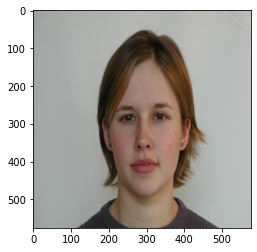

Height: 576   Width: 576
576
576


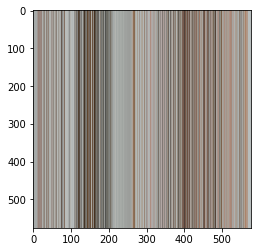

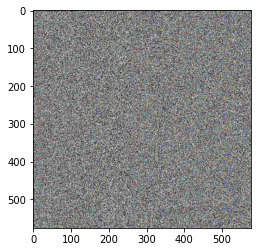

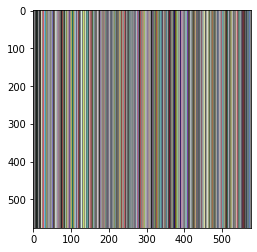

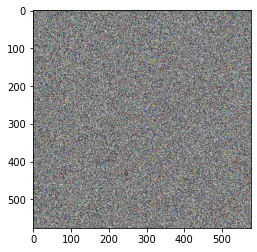

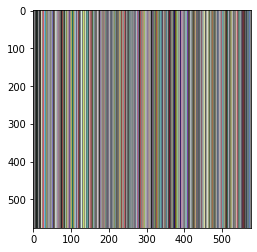

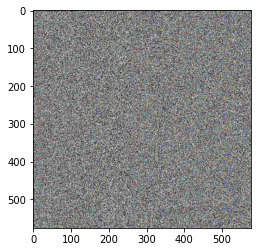

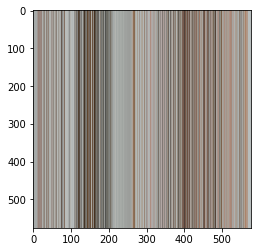

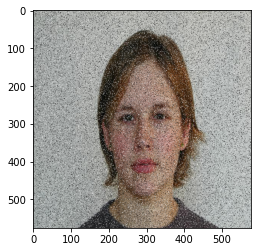

In [ ]:
import chaotic_maps as cm
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

# Accepting Image using it's path
#path = str(input('Enter path of the image\n'))
image = img.imread('/content/gdrive/MyDrive/MIT-CBCL-facerec-database/training_cvc/4/4.jpg')
#imaget = img.imread(r"C:\Users\mr\OneDrive\Desktop\mini project\cameraman.jpg")
# Displaying original image
plt.imshow(image)
plt.show()
# Storing the size of image in variables
height = image.shape[0]
width = image.shape[1]
print("Height:",height,"  Width:",width)
# Using lorenz_key function to generate 3 lists of keys
xkey, ykey, zkey = lorenz_key(0.01, 0.02, 0.03, height*width)
# Initializing empty index lists to store index of pixels
xindex = []
yindex = []
# Initializing an empty image to store the encrypted image
encryptedImage = np.zeros(shape=[height, width, 3], dtype=np.uint8)
l = 0
# Populating xindex and yindex
for i in range(width):
    xindex.append(i)
for i in range(height):
    yindex.append(i)
# Re-arranging xindex and xkey to increase randomness
for i in range(width):
    for j in range(width):
        if xkey[i] > xkey[j]:
            xkey[i], xkey[j] = xkey[j], xkey[i]
            xindex[i], xindex[j] = xindex[j], xindex[i]
print(len(xindex))            
# Re-arranging yindex and ykey to increase randomness
for i in range(height):
    for j in range(height):
        if ykey[i] > ykey[j]:
            ykey[i], ykey[j] = ykey[j], ykey[i]
            yindex[i], yindex[j] = yindex[j], yindex[i]
print(len(yindex))
# Shuffling original image's pixels and storing them in an empty image
for i in range(height):
    k = 0
    for j in range(width):
        #print(k)
        encryptedImage[i][j] = image[xindex[k]][yindex[k]] 
        k += 1
# Displaying the shuffled image
plt.imshow(encryptedImage)
plt.show()
# Calling logistic_key and providing r value such that the keys are pseudo-random
# and generating a key for every pixel of the image
generatedKey =logistic_key(0.01, 3.95, height*width) 
z = 0
# Substituting all the pixels in original image using XOR
for i in range(height):
    for j in range(width):
        encryptedImage[i, j] = encryptedImage[i, j].astype(int) ^ generatedKey[z]
        z += 1
# Displaying the intermediate encrypted image
plt.imshow(encryptedImage)
plt.show()
# Using lorenz_key function to generate 3 lists of keys
xkey1, ykey1, zkey1 = lorenz_key(0.03, 0.02, 0.01, height*width)
# Initializing empty index lists to store index of pixels
xindex1 = []
yindex1 = []
# Initializing an empty image to store the encrypted image
encryptedImage2 = np.zeros(shape=[height, width, 3], dtype=np.uint8)
l = 0
# Populating xindex and yindex
for i in range(width):
    xindex1.append(i)
for i in range(height):
    yindex1.append(i)
# Re-arranging xindex and xkey to increase randomness
for i in range(width):
    for j in range(width):
        if xkey1[i] > xkey1[j]:
            xkey1[i], xkey1[j] = xkey1[j], xkey1[i]
            xindex1[i], xindex1[j] = xindex1[j], xindex1[i]
# Re-arranging yindex and ykey to increase randomness
for i in range(height):
    for j in range(height):
        if ykey1[i] > ykey1[j]:
            ykey1[i], ykey1[j] = ykey1[j], ykey1[i]
            yindex1[i], yindex1[j] = yindex1[j], yindex1[i]
# Shuffling encrypted image's pixels and storing them in another empty image
for i in range(height):
    k = 0
    for j in range(width):
        encryptedImage2[i][j] = encryptedImage[yindex1[k]][xindex1[k]] 
        k += 1
# Displaying the newly shuffled image
plt.imshow(encryptedImage2)
plt.show()
# Calling tent_key and providing r value such that the keys are pseudo-random
# and generating a key for every pixel of the image
generatedKey1 = tent_key(0.01, 1.9, height*width) 
z = 0
# Substituting all the pixels in encrypted image using XOR
for i in range(height):
    for j in range(width):
        encryptedImage2[i, j] = encryptedImage2[i, j].astype(int) ^ generatedKey1[z]
        z += 1
# Displaying the final encrypted image
plt.imshow(encryptedImage2)
plt.show()
#decryption starts
z=0
for i in range(height):
    for j in range(width):
        encryptedImage2[i, j] = encryptedImage2[i, j].astype(int) ^ generatedKey1[z]
        z += 1

plt.imshow(encryptedImage2)
plt.show()

for i in range(height):
    k = 0
    for j in range(width):
        encryptedImage[yindex1[k]][xindex1[k]] = encryptedImage2[i][j] 
        k += 1
plt.imshow(encryptedImage)
plt.show()

z = 0

for i in range(height):
    for j in range(width):
        encryptedImage[i, j] = encryptedImage[i, j].astype(int) ^ generatedKey[z]
        z += 1

plt.imshow(encryptedImage)
plt.show()
'''
#image2 = np.zeros(shape=[height, width, 3], dtype=np.uint8)
for i in range(height):
    k = 0
    for j in range(width):
        image[yindex[k]][xindex[k]] = encryptedImage[i][j]
        k += 1
plt.imshow(image)
plt.show()
'''

def func(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
final_img = func(image,0.07)
plt.imshow(final_img)
plt.show()

In [ ]:
im=Image.fromarray(final_img)
im.save('/content/gdrive/MyDrive/MIT-CBCL-facerec-database/test_siamese/4/4.jpg')